In [1]:
import sys

sys.path.append(".")
from src.simulate.run_model import *
from src.analyses.polarization_state import *
from src.analyses.models_comparison import *

# set seed
np.random.seed(42)
dfs_to_compare = []

  0%|          | 28/100001 [00:00<13:13, 125.97it/s]

Running the classic Axelrod model as benchmark
Running Axelrod with:
display_name: Classic
num_of_agents: 100
num_of_features: 5
num_of_traits: 10
num_of_iterations: 100001




Finished running "Classic" in 582s


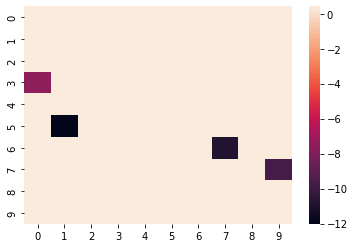

In [2]:
print("Running the classic Axelrod model as benchmark")
polarization_metrics_classic, final_df_classic = run_classic(
    display_name="Classic"
)
classic_analyze_polarization_state(final_df_classic)
dfs_to_compare.append(polarization_metrics_classic)

  0%|          | 35/100001 [00:00<09:48, 169.85it/s]

Running the Axelrod topographic variation model with single region
Running Axelrod with:
display_name: Single Region
num_of_agents: 100
num_of_features: 5
num_of_traits: 10
num_of_iterations: 100001
regions: {'region_0': 1.0}
no_sharing_combo_threshold: 4



Finished running "Single Region" in 606s


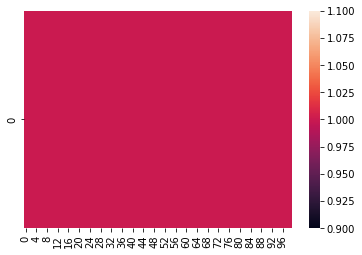

| region   |   unique_traits |   population_size |
|:---------|----------------:|------------------:|
| region_0 |               1 |               100 |


In [3]:
print("Running the Axelrod topographic variation model with single region")
polarization_metrics_single_region, final_df_single_region = run_topographic(
    display_name="Single Region",
    regions={f"region_{i}": (1 / 1.0) for i in range(1)}
)
topographic_analyze_polarization_state(final_df_single_region)
dfs_to_compare.append(polarization_metrics_single_region)

  0%|          | 33/100001 [00:00<10:09, 164.03it/s]

Running the Axelrod topographic variation model with four regions
Running Axelrod with:
display_name: Four Regions
num_of_agents: 100
num_of_features: 5
num_of_traits: 10
num_of_iterations: 100001
regions: {'region_0': 0.25, 'region_1': 0.25, 'region_2': 0.25, 'region_3': 0.25}
no_sharing_combo_threshold: 4



Finished running "Four Regions" in 605s


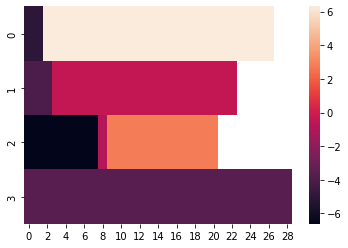

| region   |   unique_traits |   population_size |
|:---------|----------------:|------------------:|
| region_0 |               1 |                27 |
| region_1 |               1 |                23 |
| region_2 |               1 |                21 |
| region_3 |               1 |                29 |


In [4]:
print("Running the Axelrod topographic variation model with four regions")
polarization_metrics_four_regions, final_df_four_regions = run_topographic(
    display_name="Four Regions",
    regions={f"region_{i}": (1 / 4.0) for i in range(4)}
)
topographic_analyze_polarization_state(final_df_four_regions)
dfs_to_compare.append(polarization_metrics_four_regions)

  0%|          | 17/100001 [00:00<10:11, 163.49it/s]

Running the Axelrod topographic variation model with twenty regions
Running Axelrod with:
display_name: Twenty Regions
num_of_agents: 100
num_of_features: 5
num_of_traits: 10
num_of_iterations: 100001
regions: {'region_0': 0.05, 'region_1': 0.05, 'region_2': 0.05, 'region_3': 0.05, 'region_4': 0.05, 'region_5': 0.05, 'region_6': 0.05, 'region_7': 0.05, 'region_8': 0.05, 'region_9': 0.05, 'region_10': 0.05, 'region_11': 0.05, 'region_12': 0.05, 'region_13': 0.05, 'region_14': 0.05, 'region_15': 0.05, 'region_16': 0.05, 'region_17': 0.05, 'region_18': 0.05, 'region_19': 0.05}
no_sharing_combo_threshold: 4



Finished running "Twenty Regions" in 629s


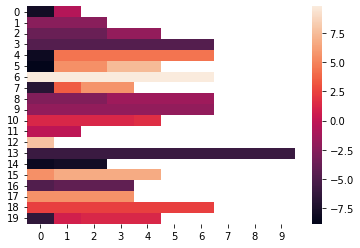

| region    |   unique_traits |   population_size |
|:----------|----------------:|------------------:|
| region_0  |               1 |                 2 |
| region_1  |               1 |                 3 |
| region_10 |               1 |                 5 |
| region_11 |               1 |                 7 |
| region_12 |               1 |                 7 |
| region_13 |               1 |                 5 |
| region_14 |               1 |                 7 |
| region_15 |               1 |                 4 |
| region_16 |               1 |                 7 |
| region_17 |               1 |                 7 |
| region_18 |               1 |                 5 |
| region_19 |               1 |                 2 |
| region_2  |               1 |                 1 |
| region_3  |               1 |                10 |
| region_4  |               1 |                 3 |
| region_5  |               1 |                 5 |
| region_6  |               1 |                 4 |
| region_7  

In [5]:
print("Running the Axelrod topographic variation model with twenty regions")
polarization_metrics_twenty_regions, final_df_twenty_regions = run_topographic(
    display_name="Twenty Regions",
    regions={f"region_{i}": (1 / 20.0) for i in range(20)}
)
topographic_analyze_polarization_state(final_df_twenty_regions)
dfs_to_compare.append(polarization_metrics_twenty_regions)

Extracting and displaying polarization metrics
Using rolling avg window 100
polarization_metrics_df size: 1001


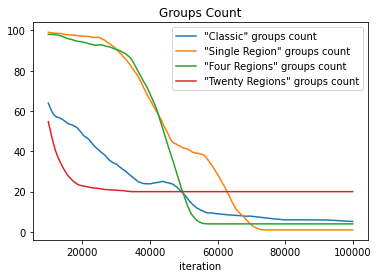

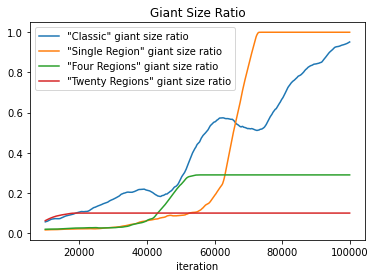

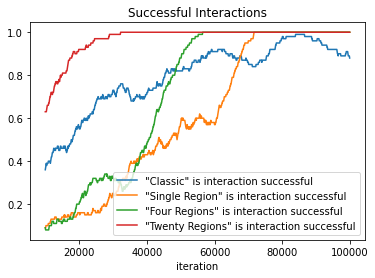

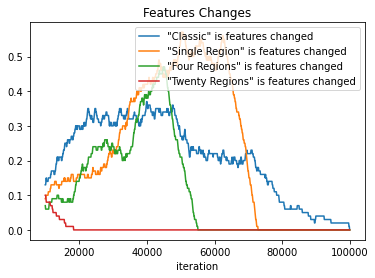

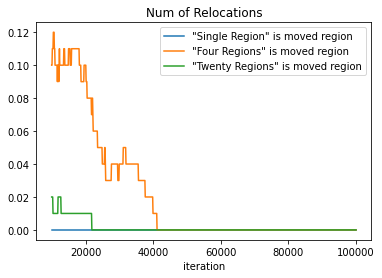

Polarization Metrics Summary:
|                                   |   100000.0 |
|:----------------------------------|-----------:|
| "Classic" giant size ratio        |       0.96 |
| "Classic" groups count            |       5    |
| "Single Region" giant size ratio  |       1    |
| "Single Region" groups count      |       1    |
| "Four Regions" giant size ratio   |       0.29 |
| "Four Regions" groups count       |       4    |
| "Twenty Regions" giant size ratio |       0.1  |
| "Twenty Regions" groups count     |      20    |


In [6]:
print("Extracting and displaying polarization metrics")
polarization_metrics_df = pd.DataFrame()
for df in dfs_to_compare:
    if polarization_metrics_df.empty:
        polarization_metrics_df = df
    else:
        polarization_metrics_df = polarization_metrics_df.join(df)
show_polarization_metrics(polarization_metrics_df)
